In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.datasets import make_blobs

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from  sklearn.cluster import KMeans

In [6]:
x,y = make_blobs(n_samples=1000,n_features=2,centers=3)

In [7]:
x

array([[ -2.82124734,  -5.80769359],
       [ -3.62480797,   7.20368243],
       [  4.38369927, -12.01895201],
       ...,
       [ -4.05882466,   6.96147393],
       [  3.07982853, -10.3495027 ],
       [ -0.21588248,  -5.13734494]])

In [8]:
y

array([0, 2, 1, 0, 2, 0, 1, 2, 2, 1, 0, 2, 0, 0, 1, 0, 2, 2, 2, 0, 2, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 2, 0, 1, 1, 0, 0, 0, 2, 1,
       2, 1, 1, 0, 1, 0, 2, 0, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 0, 2, 1,
       1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 2, 2, 1, 2, 0, 1, 2, 0, 2, 1, 2, 1,
       1, 2, 0, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 0, 1, 0, 2, 1, 2, 2,
       1, 2, 1, 0, 0, 2, 0, 0, 0, 1, 1, 0, 1, 2, 1, 0, 1, 1, 1, 0, 2, 1,
       1, 2, 1, 2, 2, 2, 1, 2, 0, 1, 1, 0, 1, 2, 0, 2, 2, 2, 0, 2, 1, 0,
       2, 0, 2, 1, 0, 1, 1, 1, 0, 2, 1, 1, 2, 2, 1, 2, 2, 1, 0, 0, 1, 0,
       2, 2, 2, 2, 1, 1, 0, 0, 2, 1, 0, 2, 1, 1, 0, 2, 0, 1, 1, 1, 0, 0,
       2, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 2, 1, 0, 0, 2, 1, 2, 2, 1, 0, 0,
       2, 2, 0, 0, 2, 1, 1, 2, 1, 2, 2, 1, 0, 1, 1, 1, 2, 2, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 2, 1, 0, 2, 0, 1, 0, 0, 2, 1, 1, 2, 0, 2, 0, 1, 2,
       1, 0, 2, 0, 0, 0, 2, 1, 0, 2, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 2, 1,
       0, 2, 1, 1, 1, 1, 0, 2, 0, 2, 1, 2, 1, 2, 1,

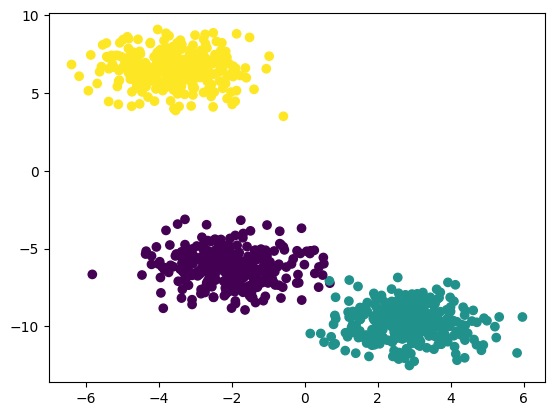

In [27]:
plt.scatter(x[:,0],x[:,1],c=y)

In [11]:
## standardization -- feature scaling technique
scaler = StandardScaler()

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [17]:
x_train_scaled = scaler.fit_transform(x_train)

In [18]:
x_test_scaled = scaler.transform(x_test)

In [20]:
### Elbow method to select the value of k
wcss = []
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(x_train_scaled)
    wcss.append(kmeans.inertia_)
    

In [21]:
wcss

[1339.9999999999998,
 448.88421442135893,
 92.93460886106953,
 76.7235868971368,
 60.04986908364207,
 44.48753752386504,
 40.31659059708889,
 33.737313302704,
 32.57194343049331,
 26.821323338495816]

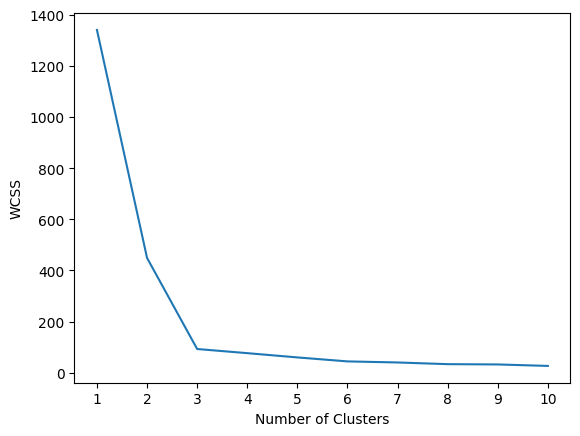

In [22]:
## plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [23]:
final_model = KMeans(n_clusters=3,init='k-means++')


In [24]:
final_model.fit(x_train_scaled)

KMeans(n_clusters=3)

In [25]:
y_pred = final_model.predict(x_test_scaled)

In [26]:
y_pred

array([1, 2, 2, 0, 2, 1, 0, 2, 1, 0, 2, 0, 0, 0, 2, 2, 2, 1, 0, 2, 1, 1,
       0, 1, 1, 1, 1, 2, 1, 0, 2, 0, 0, 1, 0, 0, 2, 2, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 2, 0, 1, 2, 1, 1, 1, 1, 2, 0, 2, 1, 0, 1, 0, 1, 1,
       1, 2, 2, 2, 1, 0, 0, 1, 2, 1, 2, 2, 0, 2, 0, 1, 1, 1, 0, 2, 1, 0,
       2, 0, 0, 1, 2, 2, 0, 2, 0, 1, 2, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 2, 1, 2, 0, 2, 2, 0, 0, 0, 0, 2, 1, 0, 2, 2,
       2, 2, 0, 0, 1, 0, 2, 1, 0, 0, 2, 0, 1, 1, 0, 1, 2, 1, 0, 2, 0, 0,
       1, 2, 2, 1, 1, 0, 2, 0, 2, 0, 0, 0, 1, 0, 0, 1, 0, 2, 1, 1, 2, 2,
       2, 2, 1, 0, 0, 1, 0, 2, 1, 0, 2, 1, 2, 2, 2, 0, 2, 2, 0, 1, 0, 2,
       1, 1, 1, 1, 2, 1, 0, 0, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 0, 2, 0, 0,
       1, 2, 2, 2, 0, 1, 1, 0, 1, 0, 2, 0, 0, 1, 1, 2, 1, 1, 2, 1, 2, 2,
       0, 2, 1, 0, 1, 0, 0, 2, 0, 1, 0, 0, 0, 1, 2, 0, 0, 2, 1, 1, 0, 0,
       0, 0, 2, 1, 0, 0, 2, 2, 0, 0, 0, 1, 2, 2, 1, 2, 0, 2, 2, 1, 2, 0,
       1, 0, 0, 2, 1, 1, 1, 1, 2, 0, 2, 1, 0, 2, 1,

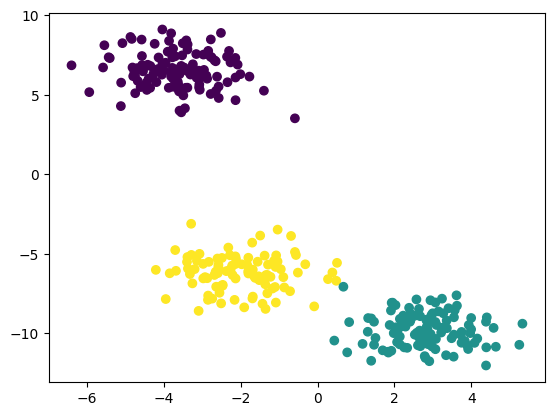

In [28]:
plt.scatter(x_test[:,0],x_test[:,1],c=y_pred)

In [30]:
## validating the value of k
## kneelocator
### silhoute scoring

In [31]:
## kneelocator
!pip install kneed

In [32]:
from kneed import KneeLocator

In [34]:
kl = KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')

In [35]:
kl.elbow

3

In [36]:
## silhoute scoring
from sklearn.metrics import silhouette_score


In [38]:
silhouette_coefficiets =[]
for k in range(2,11):
    kmeans= KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(x_train_scaled)
    score = silhouette_score(x_train_scaled,kmeans.labels_)
    silhouette_coefficiets.append(score)

In [39]:
silhouette_coefficiets

[0.6254865902692617,
 0.7401516539368852,
 0.6233289378784447,
 0.522756381937218,
 0.4999542545640638,
 0.41616518862903334,
 0.3948849546070015,
 0.37834052385492933,
 0.38904165510824823]

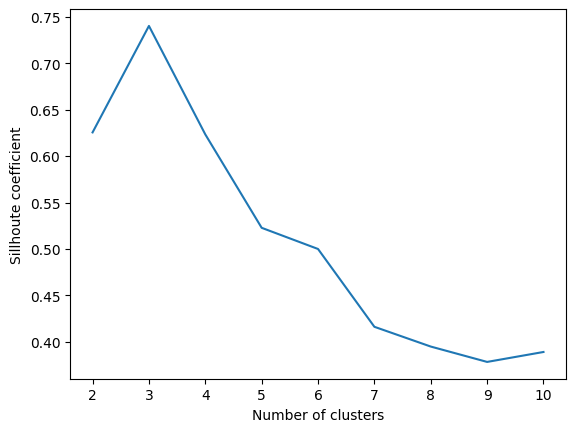

In [40]:
## ploting silhote  score 
plt.plot(range(2,11),silhouette_coefficiets)
plt.xticks(range(2,11))
plt.xlabel("Number of clusters")
plt.ylabel("Sillhoute coefficient")
plt.show()